In [542]:
import numpy as np
import pandas as pd
import os
import csv
import re
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

### Data pre-processing

In [3]:
path_dir = "/home/matius/Documentos/marcinha/discussions-labeled-dataset-main/data/transformed"
paths = []
for i in os.listdir(path_dir):
    paths.append(f"{path_dir}/{i}")

In [4]:
def generate_qas_names(data):
    qas_names = []
    for info in data:
        bool_answered = info[6]
        category_name = info[3]
        #se foi respondida ou esta na lista de nomes
        if(category_name not in qas_names and bool_answered=="1"):
            qas_names.append(category_name)
    return qas_names

In [5]:
categories_discussions = {}
data = []
id = 0
for path in paths:
    path_name = os.path.basename(path)
    with open(path, "r") as file: 
        file = open(path, "r")
        lines = file.readlines()
        #coloca todos os dados organizados no array data
        for line in lines:
            info = line.strip().split(",__,")
            info.insert(0, id)
            data.append(info)

        #qas_names = generate_qas_names(data)
        #categories_discussions[path_name] = qas_names
        id = id + 1

In [6]:
colunas = ["id_repository", "id_discussion", "title", "category", "quant_comments", "data_post", "bool_answered", "data_answered"]
qas_dataframe = pd.DataFrame(data, columns=colunas)
qas_dataframe

,id_repository,id_discussion,title,category,quant_comments,data_post,bool_answered,data_answered
0,0,5703,Binding Directly To Model & Relationship,1. Help,1,2023-05-19T16:46:30Z,0,None
1,0,3077,Can't reset a component with eloquent model,5. Bugs,9,2020-10-18T22:28:56Z,0,None
2,0,4095,How should I upload files from a data url (web...,1. Help,1,2021-10-26T08:48:51Z,0,None
3,0,1023,Simpler way to refresh component,4. General,6,2020-05-28T20:52:36Z,0,None
4,0,3763,Index id not defined error,5. Bugs,1,2021-09-15T20:07:58Z,1,2021-09-15T20:44:57Z
...,...,...,...,...,...,...,...,...
85590,83,20529,Runnig iOS UI tests on CI and empty XCResult p...,General,0,2022-08-05T11:44:24Z,0,None
85591,83,20722,Support Distribution via Mint,Ideas,0,2022-10-03T15:55:24Z,0,None
85592,83,17478,How to use application specific password when ...,Q&A,1,2020-10-21T04:06:53Z,0,None
85593,83,21314,Ionic + react + Capacitor support,General,0,2023-05-31T14:20:54Z,0,None


In [7]:
qas_dataframe["category"].unique()

array(['1. Help', '5. Bugs', '4. General', '3. Feature Ideas',
       '6. Announcements', '2. Show and tell', '7. Polls',
       '8. V3 (maintainers only to post)', 'General', 'Q&A', 'Ideas',
       'Show and tell', 'Announcements', 'Releases', 'Polls', 'RFCs',
       'Kind Words', 'RFC', 'Extension Q&A', 'Extension requests', 'Help',
       'Digital Image Processing', 'Development', 'Contribute',
       'Consulting', 'Kudos and Rants ', 'Language Ideas', 'LDM Notes',
       'Improvements', 'Japa', 'Cookbooks', 'Upgrading from Xamarin',
       'API Review', 'Feature Requests', 'Approved Requests', 'Archive',
       'Under Review', 'Team Posts', 'v1-v2 migration',
       'Release feedback', 'Release Notes', 'FAQ & Tips', 'Support',
       'New Docs site feedback', 'v3 API ideas', 'Questions',
       'Questions (Nuxt 2)', 'Sharing', 'Kind words', 'Self Hosting',
       'Bugs', 'Feature Ideas', 'Docs Discussions', 'App Router',
       'Q&A / Support', 'Bug report', 'New', 'Questions & Hel

In [8]:
qas_dataframe.to_csv("/home/matius/Documentos/marcinha/discussions-labeled-dataset-main/resources/qas.csv", columns = colunas)

## Data analysis

### defs and imports

In [9]:
from datetime import date

In [10]:
date_mh = date(2023, 4, 17)
date_mh_22 = date(2022, 4, 17)
date_limit = date(2023, 1, 17)
type(date_mh)

datetime.date

### Times

In [11]:
qas_dataframe['data_post'] = pd.to_datetime(qas_dataframe['data_post'])
qas_dataframe['data_post'] = qas_dataframe['data_post'].dt.date
qas_dataframe['data_answered'] = pd.to_datetime(qas_dataframe['data_answered'], errors='coerce')
qas_dataframe['data_answered'] = qas_dataframe['data_answered'].dt.date
qas_dataframe['data_post'] = pd.to_datetime(qas_dataframe['data_post']).dt.date
qas_dataframe['data_answered'] = pd.to_datetime(qas_dataframe['data_answered']).dt.date

/tmp/ipykernel_11858/2793892255.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  qas_dataframe['data_answered'] = pd.to_datetime(qas_dataframe['data_answered'], errors='coerce')


In [12]:
qas_dataframe

,id_repository,id_discussion,title,category,quant_comments,data_post,bool_answered,data_answered
0,0,5703,Binding Directly To Model & Relationship,1. Help,1,2023-05-19,0,NaT
1,0,3077,Can't reset a component with eloquent model,5. Bugs,9,2020-10-18,0,NaT
2,0,4095,How should I upload files from a data url (web...,1. Help,1,2021-10-26,0,NaT
3,0,1023,Simpler way to refresh component,4. General,6,2020-05-28,0,NaT
4,0,3763,Index id not defined error,5. Bugs,1,2021-09-15,1,2021-09-15
...,...,...,...,...,...,...,...,...
85590,83,20529,Runnig iOS UI tests on CI and empty XCResult p...,General,0,2022-08-05,0,NaN
85591,83,20722,Support Distribution via Mint,Ideas,0,2022-10-03,0,NaN
85592,83,17478,How to use application specific password when ...,Q&A,1,2020-10-21,0,NaN
85593,83,21314,Ionic + react + Capacitor support,General,0,2023-05-31,0,NaN


### Data format by time

In [403]:
#for days_difference, date_mh is 0. Everything after is +, before is -.
def calculate_days_difference(row):
    return (row["data_post"] - date_mh).days

qas_dataframe["days_difference"] = qas_dataframe.apply(calculate_days_difference, axis=1)

In [14]:
'''
antes_mh_22 -> same period in a23 but in 2022
depois_mh_22 -> same period in b23 but in 2023
antes_mh_23 -> 100 days before Most Helpful
depois_mh_23 -> 100 days after Most Helpful
'''
one_year = 365
qas_dataframe['quant_comments'] = pd.to_numeric(qas_dataframe['quant_comments'], errors='coerce')
antes_mh_dataframe = qas_dataframe[qas_dataframe["days_difference"] < 0].copy()
antes22 = qas_dataframe[(qas_dataframe["days_difference"] >= (-100-one_year)) & (qas_dataframe["days_difference"] < (-one_year))]
depois22 = qas_dataframe[(qas_dataframe["days_difference"] < (100-one_year)) & (qas_dataframe["days_difference"] >= (-one_year))]
antes23 = qas_dataframe[(qas_dataframe["days_difference"] >= -100) & (qas_dataframe["days_difference"] < 0)]
depois23 = qas_dataframe[(qas_dataframe["days_difference"] < 100) & (qas_dataframe["days_difference"] >= 0)]

qas_dataframe = qas_dataframe.drop(columns=["days_difference"])

In [15]:
print(antes22.days_difference.min(), depois22.days_difference.min(), antes23.days_difference.min(), depois23.days_difference.min())

-465 -365 -100 0


In [16]:
print(antes22.days_difference.max(), depois22.days_difference.max(), antes23.days_difference.max(), depois23.days_difference.max())

-366 -266 -1 99


### Proporções 

In [17]:
#retorna dois dfs: feitas antes & respondidas antes, feitas antes & respondidas depois
def particiona_data_antes(df, date):
    before_date = df[(df.data_answered < date)]
    after_date = df[(df.data_answered >= date)]
    return before_date, after_date

In [18]:
def porcentagem_respostas(df):
    return len(df[(df.data_answered < date_mh)])/len(df)

In [19]:
#ra -> respondidas antes
#rd -> respondidas depois
antes22_ra, antes22_rd = particiona_data_antes(antes22, date_mh_22)
antes23_ra, antes23_rd = particiona_data_antes(antes23, date_mh)

In [ ]:
#verifica se as proporções foram mantidas
print(len(antes22_ra)/len(antes22), len(antes22_rd)/len(antes22), len(antes22[antes22.bool_answered == '1'])/len(antes22))
print(len(antes22_ra)+len(antes22_rd), len(antes22[antes22.bool_answered == '1']))

In [ ]:
print(len(antes23_ra)/len(antes23), len(antes23_rd)/len(antes23), len(antes23[antes23.bool_answered == '1'])/len(antes23))
print(len(antes23_ra)+len(antes23_rd), len(antes23[antes23.bool_answered == '1']))

In [ ]:
print(len(antes22), len(depois22), len(antes23), len(depois23))

In [ ]:
total_criadas_antes_22_ra = len(antes22_ra)/len(antes22)
total_criadas_antes_22_rd = len(antes22_rd)/len(antes22)

total_criadas_antes_23_ra = len(antes23_ra)/len(antes23)
total_criadas_antes_23_rd = len(antes23_rd)/len(antes23)

dif_antes_ra = (total_criadas_antes_22_ra - total_criadas_antes_23_ra)
dif_antes_rd = (total_criadas_antes_22_rd - total_criadas_antes_23_rd)
per_rd_22 = (len(depois22[depois22.bool_answered == '1'])/len(depois22)) * 100
per_rd_23 = (len(depois23[depois23.bool_answered == '1'])/len(depois23)) * 100

print(dif_antes_ra*100, dif_antes_rd*100,per_rd_22-per_rd_23)

In [ ]:
print("antes22_ra: 31.314741035856575, antes22_rd: 1.8326693227091632, antes_total: 33.14741035856574")

In [ ]:
print("antes23_ra: 26.199364025991984, antes23_rd: 1.0922162311627263, antes_total: 27.29158025715471")

In [ ]:
print(per_rd_22, per_rd_23)

### Metrics

antes22, depois22 <-> antes23, depois23

--------------------------------------------------------------------------------

antes22    -> all antes em 2022

antes22_ra -> feitas antes, respondidas antes 

antes22_rd -> feitas depois, respondidas depois

depois22   -> all depois em 2022

--------------------------------------------------------------------------------

antes23    -> all antes em 2023 

antes23_ra -> feitas antes,  respondidas antes

antes23_rd -> feitas depois, respondidas depois

depois23   -> all depois em 2023

#### 1. Qtd comentários

In [537]:
depois22['quant_comments'].sum(), depois23['quant_comments'].sum()

(10929, 8119)

In [593]:
total_comments_22 = antes22['quant_comments'].sum() + depois22['quant_comments'].sum()
total_comments_23 = antes23['quant_comments'].sum() + depois23['quant_comments'].sum()

comments_df = [
    [2022, total_comments_22, (antes22["quant_comments"].sum()/total_comments_22)*100, (depois22["quant_comments"].sum()/total_comments_22)*100],
    [2023, total_comments_23, (antes23["quant_comments"].sum()/total_comments_23)*100, (depois23["quant_comments"].sum()/total_comments_23)*100]]     

df = pd.DataFrame(comments_df, columns=['Year', 'Total', 'antes', 'depois'])

fig = px.bar(df, x="Year", y=["antes", "depois"], title="Number of comments")
fig.show()

#### 2. Perguntas sem resposta

In [538]:
len(depois22[depois22['bool_answered'] == '0']), len(depois23[depois23['bool_answered'] == '0'])

(5205, 5284)

In [594]:
total_no_answered_22 = len(antes22[antes22['bool_answered'] == '0'])+ len(depois22[depois22['bool_answered'] == '0'])
total_no_answered_23 = len(antes23[antes23['bool_answered'] == '0']) + len(depois23[depois23['bool_answered'] == '0'])

no_answered_df = [
    [2022, total_no_answered_22, (len(antes22[antes22['bool_answered'] == '0'])/total_no_answered_22)*100, (len(depois22[depois22['bool_answered'] == '0'])/total_no_answered_22)*100],
    [2023, total_no_answered_23, (len(antes23[antes23['bool_answered'] == '0'])/total_no_answered_23)*100, (len(depois23[depois23['bool_answered'] == '0'])/total_no_answered_23)*100]
]

df_no_answered = pd.DataFrame(comments_df, columns=['Year', 'Total', 'antes', 'depois'])

fig = px.bar(df_no_answered, x="Year", y=["antes", "depois"], title="no answered")
fig.show()


In [540]:
len(antes22[antes22['bool_answered'] == '0']), len(depois22[depois22['bool_answered'] == '0'])

(5034, 5205)

In [541]:
len(antes23[antes23['bool_answered'] == '0']), len(depois23[depois23['bool_answered'] == '0'])

(5259, 5284)

#### 3. Tempo médio de resposta

In [ ]:
def days_to_answer(row):
    if(type(row["data_answered"]) == type(date_mh)):
        return int((row["data_answered"] - row["data_post"]).days)
    else:
        return None

antes22_ra["time_to_answer"] = antes22_ra.apply(days_to_answer, axis=1)
antes22_rd["time_to_answer"] = antes22_rd.apply(days_to_answer, axis=1)
depois22["time_to_answer"] = depois22.apply(days_to_answer, axis=1)

antes23_ra["time_to_answer"] = antes23_ra.apply(days_to_answer, axis=1)
antes23_rd["time_to_answer"] = antes23_rd.apply(days_to_answer, axis=1)
depois23["time_to_answer"] = depois23.apply(days_to_answer, axis=1)

In [ ]:
antes22_rd.groupby("time_to_answer").count()

<Axes: xlabel='time_to_answer'>

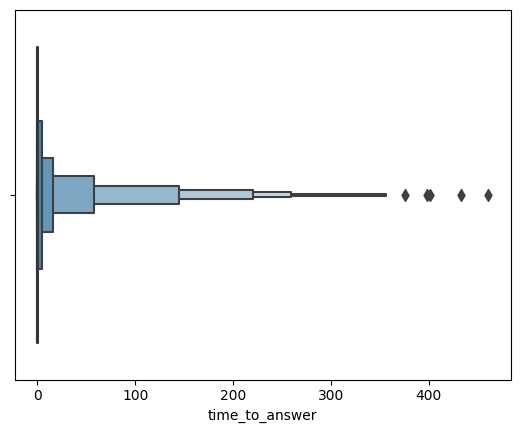

In [548]:
sns.boxenplot(x=depois22.time_to_answer)

<Axes: xlabel='time_to_answer'>

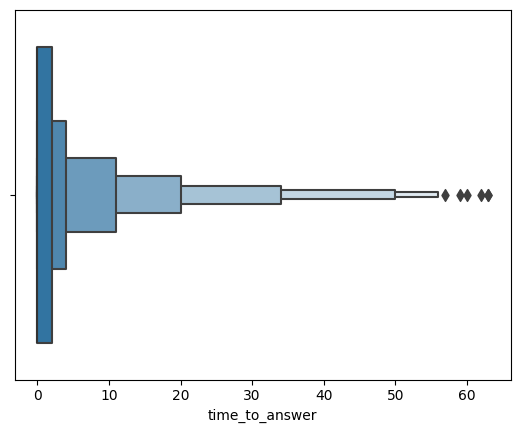

In [549]:
sns.boxenplot(x=depois23.time_to_answer)

In [543]:
dataframes = [antes22_ra, antes22_rd, depois22, antes23_ra, antes23_rd, depois23]

for dataframe in dataframes:
    print(dataframe.time_to_answer.describe())
    #sns.boxenplot(x=dataframe.time_to_answer)

count    2358.000000
mean        1.863868
std         6.121985
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        81.000000
Name: time_to_answer, dtype: float64
count    138.000000
mean     137.688406
std      139.032360
min        1.000000
25%       18.000000
50%       99.000000
75%      215.500000
max      529.000000
Name: time_to_answer, dtype: float64
count    2256.000000
mean        7.280142
std        34.243908
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       461.000000
Name: time_to_answer, dtype: float64
count    1895.000000
mean        1.601055
std         4.778096
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        89.000000
Name: time_to_answer, dtype: float64
count     79.000000
mean      45.835443
std       43.738568
min        1.000000
25%        9.000000
50%       30.000000
75%       76.000000
max      163.000000
Name: time_to_answer, dtype:

#### 4. Quantidade de Discussões Criadas

In [550]:
total_discussions_22 = len(antes22) + len(depois22)
total_discussions_23 = len(antes23) + len(depois23)

qtd_discussoes_df = [
    [2022, total_discussions_22, (len(antes22)/total_discussions_22)*100, (len(antes22)/total_discussions_22)*100],
    [2023, total_discussions_23, (len(antes23)/total_discussions_23)*100, (len(antes23)/total_discussions_23)*100]
]     

df = pd.DataFrame(comments_df, columns=['Year', 'Total', 'antes', 'depois'])

fig = px.bar(df, x="Year", y=["antes", "depois"], title="Quantidade de discussões criadas")
fig.show()

#### 5. Quantidade de discussões respondidas

In [552]:
antes22

,id_repository,id_discussion,title,category,quant_comments,data_post,bool_answered,data_answered,days_difference
26,0,4675,Livewire validateOnly() no longer validates en...,5. Bugs,2,2022-02-15,0,NaT,-426
74,0,4519,"Testing communication between components, can'...",1. Help,2,2022-01-15,0,NaT,-457
75,0,4771,Livewire Overrules Alpine's x-cloak,5. Bugs,1,2022-03-07,0,NaT,-406
78,0,4740,Save session data long term that persists in L...,1. Help,1,2022-02-28,1,2022-02-28,-413
85,0,4696,Not refreshing list of items after remove one,1. Help,1,2022-02-17,1,2022-02-17,-424
...,...,...,...,...,...,...,...,...,...
85558,83,20119,No such file or directory - flutter,Q&A,0,2022-03-25,0,NaT,-388
85565,83,19941,"For running the Fastlane, how do I configure J...",Q&A,0,2022-02-09,0,NaT,-432
85574,83,19977,Selective nuke,Q&A,2,2022-02-16,1,2022-02-17,-425
85584,83,20019,Get versionName in lane,Q&A,0,2022-02-28,0,NaT,-413


In [596]:
total_22 = len(antes22) + len(depois22)
qtd_non_answered_22 = len(antes22[antes22.bool_answered == "0"]) + len(depois22[depois22.bool_answered == "0"])

total_23 = len(antes23) + len(depois23)
qtd_non_answered_23 = len(antes23[antes23.bool_answered == "0"]) + len(depois23[depois23.bool_answered == "0"])

qtd_answered_df = [
    [2022, total_22, (len(antes22_ra)/total_22)*100, (len(antes22_rd)/total_22)*100, (len(depois22[depois22.bool_answered=="1"])/total_22)*100, (qtd_non_answered_22/total_22)*100],
    [2023, total_23, (len(antes23_ra)/total_23)*100, (len(antes23_rd)/total_23)*100, (len(depois23[depois23.bool_answered=="1"])/total_23)*100, (qtd_non_answered_23/total_23)*100]
]     

df = pd.DataFrame(qtd_answered_df, columns=['Year', 'Total', 'antes_ra', 'antes_rd', 'depois', 'non_answered'])

fig = px.bar(df, x="Year", y=['antes_ra', 'antes_rd', 'depois', 'non_answered'], title="Number of answered", text_auto='.3')
fig.show()

In [188]:
total_22 = len(antes22) + len(depois22)
qtd_non_answered_22 = len(antes22[antes22.bool_answered == "0"]) + len(depois22[depois22.bool_answered == "0"])

total_23 = len(antes23) + len(depois23)
qtd_non_answered_23 = len(antes23[antes23.bool_answered == "0"]) + len(depois23[depois23.bool_answered == "0"])

qtd_answered_df = [
    [2022, total_22, (len(antes22[antes22.bool_answered=="1"])/total_22)*100, (len(depois22[depois22.bool_answered=="1"])/total_22)*100, (qtd_non_answered_22/total_22)*100],
    [2023, total_23, (len(antes23[antes23.bool_answered=="1"])/total_23)*100, (len(depois23[depois23.bool_answered=="1"])/total_23)*100, (qtd_non_answered_23/total_23)*100]
]     

df = pd.DataFrame(qtd_answered_df, columns=['Year', 'Total', 'antes', 'depois', 'non_answered'])

fig = px.bar(df, x="Year", y=['antes', 'depois', 'non_answered'], title="Quantidade de discussões respondidas - SEM DIVISAO", text_auto='.3')
fig.show()

#### 6. Evolução das respostas

In [344]:
import plotly.graph_objects as go


In [463]:
def format_df(dataframe, coluna = "data_post"):
    dataframe_formated = dataframe.groupby(coluna).count()[["id_repository"]]
    dataframe_formated.reset_index(inplace=True)
    dataframe_formated.reset_index(inplace=True) #faz duas vezes p acessar o contador
    dataframe_formated.columns = ['id', coluna, 'quantidade']

    return dataframe_formated

def rolling_df(dataframe_formated, window_size=7):
    # Calcule a soma das quantidades em uma janela deslizante
    dataframe_formated['soma'] = dataframe_formated['quantidade'].rolling(window=window_size).sum()
    # Preencha as primeiras linhas (onde a janela não é completamente preenchida) com 0
    dataframe_formated['soma'].iloc[:window_size-1] = 0


##### 6.1 Evolução das discussões criadas

In [464]:
dataframe22 = pd.concat([antes22, depois22])
dataframe23 = pd.concat([antes23, depois23])
dataframe_all_answered = pd.concat([dataframe22[dataframe22.bool_answered == "1"], dataframe23[dataframe23.bool_answered == "1"]])
natal_22 = date(2022, 12, 25)

In [465]:
dataframe_all_answered

,id_repository,id_discussion,title,category,quant_comments,data_post,bool_answered,data_answered,days_difference,time_to_answer
78,0,4740,Save session data long term that persists in L...,1. Help,1,2022-02-28,1,2022-02-28,-413,NaN
85,0,4696,Not refreshing list of items after remove one,1. Help,1,2022-02-17,1,2022-02-17,-424,NaN
88,0,4866,wire:model not work on submit button,1. Help,1,2022-04-07,1,2022-04-25,-375,NaN
194,0,4672,[UX] Unexpected behaviour on pagination edges,5. Bugs,2,2022-02-15,1,2022-02-20,-426,NaN
214,0,4507,How to use one modal in multiple nested compon...,1. Help,2,2022-01-11,1,2022-01-15,-461,NaN
...,...,...,...,...,...,...,...,...,...,...
84512,83,21398,Multiple programs in S3 bucket,Q&A,1,2023-07-14,1,2023-07-14,88,0.0
84599,83,21234,"How does supply work with ""internal"" track to ...",Q&A,1,2023-04-25,1,2023-05-09,8,14.0
84818,83,21346,Unable to locate Xcode. Please make sure to ha...,Q&A,1,2023-06-16,1,2023-06-16,60,0.0
85111,83,21342,Fastlane is suuuuuper slow to even start,General,2,2023-06-15,1,2023-06-15,59,0.0


In [466]:
#perguntas
dataframe_total_22 = format_df(dataframe22)
rolling_df(dataframe_total_22)
dataframe_total_23 = format_df(dataframe23)
rolling_df(dataframe_total_23)

/tmp/ipykernel_11858/2605957342.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_11858/2605957342.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [468]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=dataframe_total_22["id"], y=dataframe_total_22["soma"], name="Criadas (2022)",
                         line=dict(color='rgb(231,107,243)', width=4)))


fig.add_trace(go.Scatter(x=dataframe_total_23["id"], y=dataframe_total_23["soma"], name="Criadas (2023)",
                         line=dict(color='firebrick', width=4, dash="dashdot")))

fig.update_layout(title='Rolling das perguntas')
fig.show()

##### 6.2 Evolução das discussões respondidas

In [469]:
date_limite_inferior_22 = date(2022, 1, 7)
date_limite_superior_22 = date(2022, 7, 26)

date_limite_inferior_23 = date(2023, 1, 7)
date_limite_superior_23 = date(2023, 7, 26)


In [470]:
respondidas_intervalo_22 = qas_dataframe[(qas_dataframe.data_answered >= date_limite_inferior_22) & (qas_dataframe.data_answered < date_limite_superior_22)]
respondidas_intervalo_23 = qas_dataframe[(qas_dataframe.data_answered >= date_limite_inferior_23) & (qas_dataframe.data_answered < date_limite_superior_23)]

In [471]:
formated_respondidas_intervalo_22 = format_df(respondidas_intervalo_22, coluna="data_answered")
rolling_df(formated_respondidas_intervalo_22)

formated_respondidas_intervalo_23 = format_df(respondidas_intervalo_23, coluna="data_answered")
rolling_df(formated_respondidas_intervalo_23)

/tmp/ipykernel_11858/2605957342.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_11858/2605957342.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [472]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=formated_respondidas_intervalo_22["id"], y=formated_respondidas_intervalo_22["soma"], name="Respondidas (2022)",
                         line=dict(color='pink', width=4)))


fig.add_trace(go.Scatter(x=formated_respondidas_intervalo_23["id"], y=formated_respondidas_intervalo_23["soma"], name="Respondidas (2023)",
                         line=dict(color='red', width=4, dash="dashdot")))

fig.update_layout(title='Rolling das respostas')
fig.show()

In [597]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=dataframe_total_22["id"], y=dataframe_total_22["soma_5_em_5"], name="Criadas (2022)",
                         line=dict(color='firebrick', width=4)))


fig.add_trace(go.Scatter(x=dataframe_total_23["id"], y=dataframe_total_23["soma_5_em_5"], name="Criadas (2023)",
                         line=dict(color='rgb(231,107,243)', width=4, dash="dashdot")))


fig.add_trace(go.Scatter(x=formated_respondidas_intervalo_22["id"], y=formated_respondidas_intervalo_22["soma_5_em_5"], name="Respondidas (2022)",
                         line=dict(color='red', width=4)))


fig.add_trace(go.Scatter(x=formated_respondidas_intervalo_23["id"], y=formated_respondidas_intervalo_23["soma_5_em_5"], name="Respondidas (2023)",
                         line=dict(color='green', width=4, dash="dashdot")))


fig.update_layout(title='Rolling')
fig.show()

KeyError: 'soma_5_em_5'

##### 6.3 Evolução de ambas nos dois anos

In [509]:
date_mh - date_limite_inferior_22

datetime.timedelta(days=465)

In [507]:
date_mh

datetime.date(2023, 4, 17)

In [474]:
date_limite_inferior_22 = date(2022, 1, 7)
date_limite_superior_23 = date(2023, 7, 26)

In [ ]:
qas_feitas_dataframe = qas_dataframe[(qas_dataframe.data_post >= date_limite_inferior_22) & (qas_dataframe.data_post <= date_limite_superior_23)]
formated_qas_feitas_dataframe = format_df(qas_feitas_dataframe)
rolling_df(formated_qas_feitas_dataframe)

qas_answered_dataframe = qas_dataframe[(qas_dataframe.data_answered >= date_limite_inferior_22) & (qas_dataframe.data_answered <= date_limite_superior_23)]
formated_qas_answered_dataframe = format_df(qas_answered_dataframe,coluna="data_answered")
rolling_df(formated_qas_answered_dataframe)

In [532]:
value_150 = []
for i in range(0, len(formated_qas_answered_dataframe["data_answered"])):
    value_150.append(150)


In [554]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=formated_qas_feitas_dataframe["data_post"], y=formated_qas_feitas_dataframe["soma"], name="Created -  All time",
                         line=dict(color='firebrick', width=4)))


fig.add_trace(go.Scatter(x=formated_qas_answered_dataframe["data_answered"], y=formated_qas_answered_dataframe["soma"], name="Answered - All time",
                         line=dict(color='green', width=4)))


#linha em 150
fig.add_trace(go.Scatter(x=formated_qas_answered_dataframe["data_answered"], y=value_150, name="Constante 150", showlegend=False,
                         line=dict(color='blue', width=1,dash="dot")))

fig.update_layout(title='Rolling (2022 - 2023)', xaxis_title ="time", yaxis_title="Number of Discussions")
fig.show()

##### Avaliando os mais engajados

In [584]:
ids = [50]
most_engaged_df  = qas_dataframe[qas_dataframe['id_repository'].isin(ids)]
#new_dataframe = qas_dataframe.groupby("id_repository").count().sort_values(by="id_discussion", ascending=False)

In [585]:
qas_feitas_dataframe_engaged = most_engaged_df[(most_engaged_df.data_post >= date_limite_inferior_22) & (most_engaged_df.data_post <= date_limite_superior_23)]
formated_qas_feitas_dataframe_engaged = format_df(qas_feitas_dataframe_engaged)
rolling_df(formated_qas_feitas_dataframe_engaged)

qas_answered_dataframe_engaged  = most_engaged_df[(most_engaged_df.data_answered >= date_limite_inferior_22) & (most_engaged_df.data_answered <= date_limite_superior_23)]
formated_qas_answered_dataframe_engaged  = format_df(qas_answered_dataframe_engaged ,coluna="data_answered")
rolling_df(formated_qas_answered_dataframe_engaged )

/tmp/ipykernel_11858/2605957342.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_11858/2605957342.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [591]:
value_25 = []
for i in range(0, 500):
    value_25.append(25)

In [592]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=formated_qas_feitas_dataframe_engaged["data_post"], y=formated_qas_feitas_dataframe_engaged["soma"], name="Created -  All time",
                         line=dict(color='firebrick', width=4)))


fig.add_trace(go.Scatter(x=formated_qas_answered_dataframe_engaged["data_answered"], y=formated_qas_answered_dataframe_engaged["soma"], name="Answered - All time",
                         line=dict(color='green', width=4)))


#linha em 150

fig.add_trace(go.Scatter(x=formated_qas_answered_dataframe["data_answered"], y=value_25, name="Constante 150", showlegend=False,
                         line=dict(color='blue', width=1,dash="dot")))
fig.update_layout(title='Rolling (2022 - 2023)', xaxis_title ="time", yaxis_title="Number of Discussions")
fig.show()

#### 6. abertar antes e fechadas depois

In [ ]:
len(antes_mh_dataframe_timeskip)

In [ ]:
aafd_dfaafd_df = antes_mh_dataframe_timeskip[(antes_mh_dataframe_timeskip['data_answered'] >= date_mh)]
#quant_comment = aafd_df["quant_comments"].sum()
aafd_df

In [ ]:
aafd_df = antes_mh_dataframe_timeskip[(antes_mh_dataframe_timeskip['data_answered'] >= date_mh) & (antes_mh_dataframe_timeskip.days_difference > -100)]
#quant_comment = aafd_df["quant_comments"].sum()
aafd_df
#aafd_df["quant_comments"].median()

In [ ]:
depois_mh_dataframe[depois_mh_dataframe.bool_answered == "1"]

In [ ]:
2023-05-19

In [ ]:
antes_mh_dataframe_timeskip

In [ ]:
#antes timeskip
len(antes_mh_dataframe_timeskip[(antes_mh_dataframe_timeskip.data_post < date_mh)])

In [ ]:
#respondidas antes e criada antes - timeskip
len(antes_mh_dataframe_timeskip[(antes_mh_dataframe_timeskip.data_answered < date_mh)])/len(antes_mh_dataframe_timeskip)

In [ ]:
len(depois_mh_dataframe[(depois_mh_dataframe.data_answered > date_mh)])/len(depois_mh_dataframe)

In [ ]:
antes_mh_dataframe_timeskip.days_difference.min()

In [ ]:
antes_mh_dataframe_timeskip.days_difference.max()

In [ ]:
antes_mh_dataframe_timeskip

In [ ]:
aafd_df[aafd_df.id_discussion == "20632"]

In [ ]:
aafd_df["id_repository"].nunique()

In [ ]:
antes_total = antes_mh_dataframe[ antes_mh_dataframe['bool_answered'] == "1"]